<a href="https://colab.research.google.com/github/pmap1986/Paula_Alfonso_KC/blob/main/Taller_Semana7_Paula_Alfonso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

# Taller

## Recapitulando clustering
- Crear una matriz de distancia usando criterio de enlace
    - ```method```: como calcular la proximidad de los clusters
    - ```metric```: metrica de distancia
    - ```optimal_ordering```: Orden de los puntos 
- Tipos de method
    - single: basado en los 2 objetos mas cercanos
    - complete: basado en los dos objetos mas lejanos 
    - average: basado en la media aritmetica de todos los objetos 
    - centroids: basado en la media geometrica de todos los objetos 
    - median: basado en la median de todos los objetos 
    - ward: basado en la suma de cuadrado 

# Agrupación en el conjunto de datos del vehículo

Imagine que un fabricante de automóviles ha desarrollado prototipos para un vehículo nuevo. Antes de introducir el nuevo modelo en su gama, el fabricante quiere determinar qué vehículos existentes en el mercado se parecen más a los prototipos, es decir, cómo se pueden agrupar los vehículos, qué grupo es el más similar al modelo y, por tanto, qué modelos. estarán compitiendo contra ellos.

Nuestro objetivo aquí es utilizar métodos de agrupamiento para encontrar los grupos de vehículos más distintivos. Resumirá los vehículos existentes y ayudará a la fabricación a tomar decisiones sobre nuevos modelos de forma sencilla.

### Descargar datos
Para descargar los datos, usaremos **`!wget`**. Estos datos se encuentran alojado en una API: IBM Object Storage.
__ ¿Lo sabían? __ Cuando se trata de aprendizaje automático, es probable que trabaje con grandes conjuntos de datos. Como empresa, ¿dónde puede alojar sus datos? IBM ofrece una oportunidad única para las empresas, con 10 Tb de IBM Cloud Object Storage: [Pueden registrarse aqui](http://cocl.us/ML0101EN-IBM-Offer-CC)

In [3]:
!wget -O cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv

--2021-09-22 21:52:17--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: ‘cars_clus.csv’

cars_clus.csv       100%[===================>]  17.36K  --.-KB/s    in 0s      

2021-09-22 21:52:17 (166 MB/s) - ‘cars_clus.csv’ saved [17774/17774]



# Leer los datos

In [4]:
filename = 'cars_clus.csv'
#Lectura
pdf = pd.read_csv(filename)
print ("Shape: ", pdf.shape)
pdf.head(5)

Shape:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


Los features incluyen:
- price en thousands (price)
- engine size (engine_s)
- horsepower (horsepow)
- wheelbase (wheelbas)
- width (width)
- length (length)
- curb weight (curb_wgt)
- fuel capacity (fuel_cap) 
- fuel efficiency (mpg).

# Data cleaning

1. Observando el proceso que se observa en el codigo de abajo que pueden concluir de que se realizo ?

In [5]:
print ("Shape antes de cleaning: ", pdf.shape)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape despues de cleaning: ", pdf.shape)
pdf.head(5)

Shape antes de cleaning:  (159, 16)
Shape despues de cleaning:  (117, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


**Respuesta**

R// con pd.to_numeric se convierten los string en valores numericos, Luego se eliminaron las filas con nulos y se resetea el index para que tome el consecutivo de las filas que se eliminaron.

# Feature selection

2. Seleccionar las columnas ``engine_s,  horsepow, wheelbas, width, lenght, curb_wgt, fuel_cap y mpg`` y guardarlas en el dataset ``featureset``

In [6]:
featureset = pdf[['engine_s','wheelbas','width','length','curb_wgt','fuel_cap','mpg']]
featureset.head(5)


,engine_s,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,108.1,70.3,192.9,3.517,17.2,25.0
2,3.5,114.6,71.4,196.6,3.850,18.0,22.0
3,1.8,102.6,68.2,178.0,2.998,16.4,27.0
4,2.8,108.7,76.1,192.0,3.561,18.5,22.0


# Clustering usando SCIpy

3. En esta parte usamos el paquete Scipy para agrupar el conjunto de datos:
Primero, calculamos la matriz de distancias.

Convertir a una matriz de distancias el dataset ``feature_set`` utilizando la funcion ``featureset.values`` y guardar el resultado en ``feature_mtx``



In [8]:
from sklearn.preprocessing import StandardScaler
feature_set=featureset.values[:,1:]
feature_set=np.nan_to_num(feature_set)
feature_mtx = StandardScaler().fit_transform(feature_set)


Con la matriz creada previamente ``feature_mtx`` correr el codigo de acontinuación (Esto consiste en encontrar una matriz de distancias entre individuos/automoviles). El resultado se guarda en una matriz D. 

**Nota** Si todo marcha en orden no deberia haber problemas con los siguientes dos segmentos de código

In [9]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
D

array([[0.        , 2.72912348, 3.85589073, ..., 1.57735464, 1.33570019,
        0.99336249],
       [2.72912348, 0.        , 1.2860307 , ..., 1.26596766, 3.13643841,
        2.89579444],
       [3.85589073, 1.2860307 , 0.        , ..., 2.42278597, 4.1340931 ,
        3.92863206],
       ...,
       [1.57735464, 1.26596766, 2.42278597, ..., 0.        , 2.24555975,
        1.91200901],
       [1.33570019, 3.13643841, 4.1340931 , ..., 2.24555975, 0.        ,
        0.79207424],
       [0.99336249, 2.89579444, 3.92863206, ..., 1.91200901, 0.79207424,
        0.        ]])

En la agrupación aglomerativa, en cada iteración, el algoritmo debe actualizar la matriz de distancia para reflejar la distancia del grupo recién formado con los grupos restantes en el bosque.

Los siguientes métodos son compatibles con Scipy para calcular la distancia entre el grupo recién formado y cada uno:

     - single
     - complete
     - average
     - weighted
     - centroid
    
4. Utilizaremos __complete__ para nuestro caso, pero en una proxima oportunidad siéntanse libres de cambiarlo para ver cómo cambian los resultados. Calcular el objeto Z por medio de la siguiente estructura de código:

``import pylab``

``import scipy.cluster.hierarchy``

``z=scipy.cluster.hierachy.linkage(D,'complete')``



In [11]:
import pylab

import scipy.cluster.hierarchy

Z=scipy.cluster.hierarchy.linkage(D,'complete')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


Esencialmente, la agrupación jerárquica no requiere un número predeterminado de agrupaciones. Sin embargo, en algunas aplicaciones queremos una partición de clústeres disjuntos como en un clúster plano.

Entonces podemos usar una línea de corte:

In [12]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([30, 48, 14, 33, 21, 10, 49, 47, 40, 43, 22, 42, 17, 19, 46, 34, 52,
       41, 41, 44, 45, 24, 66, 52, 54, 23, 51, 22, 38, 52, 53,  8, 61, 65,
       62,  5, 20, 27, 55, 50, 41,  1, 12,  4, 63, 16, 61, 24, 51, 49,  6,
       11, 25, 30, 53, 48, 31, 58,  6, 48, 46, 13, 19,  2, 27, 37, 50, 46,
       59,  9, 56, 32, 32, 41,  1, 12, 18, 49, 15,  3,  7, 26, 50, 48, 18,
        6, 52, 17, 57,  3, 38, 51, 20, 33, 52, 44, 40, 42, 39, 39, 39, 24,
       24, 27, 24, 51, 47, 26, 35, 28, 60, 64, 29, 36, 50, 28, 29],
      dtype=int32)

In [13]:
# Determinar clusters
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([2, 3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 2,
       5, 3, 3, 1, 3, 1, 3, 3, 3, 1, 4, 4, 4, 1, 1, 2, 3, 3, 3, 1, 1, 1,
       4, 1, 4, 2, 3, 3, 1, 1, 2, 2, 3, 3, 2, 3, 1, 3, 3, 1, 1, 1, 2, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 2, 3, 3, 1, 1, 3, 1,
       3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2,
       3, 4, 2, 3, 3, 2, 2], dtype=int32)

# Dendrograma

5. Utilizar el objeto ``Z`` creado previamente en la funcion ``scipy.cluster.hierarchy.dendrogram`` para obtener el dendrograma para ello pueden utilizar de ayuda el siguiente código:
`

In [14]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )

<Figure size 1296x3600 with 0 Axes>

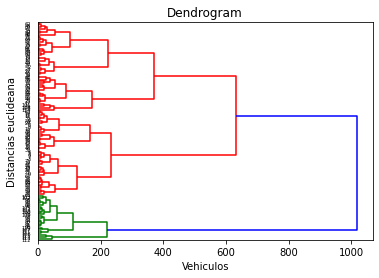

In [16]:
dendrogram = sch.dendrogram(sch.linkage(Z, method  = "ward",metric='euclidean',),
                            orientation='right',# Diferentes formas: right, left, bottom, top
                            ) 

pylab.title('Dendrogram')
pylab.xlabel('Vehiculos')
pylab.ylabel('Distancias euclideana')
pylab.show()

# Usando scikit learn

Ahora obtenemos la matriz de distancias usando scikit learn

In [17]:
from scipy.spatial import distance_matrix 

dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         2.72912348 3.85589073 ... 1.57735464 1.33570019 0.99336249]
 [2.72912348 0.         1.2860307  ... 1.26596766 3.13643841 2.89579444]
 [3.85589073 1.2860307  0.         ... 2.42278597 4.1340931  3.92863206]
 ...
 [1.57735464 1.26596766 2.42278597 ... 0.         2.24555975 1.91200901]
 [1.33570019 3.13643841 4.1340931  ... 2.24555975 0.         0.79207424]
 [0.99336249 2.89579444 3.92863206 ... 1.91200901 0.79207424 0.        ]]


6. Utilizar el metodo ``AgglomerativeClustering`` visto en clase con ``n_clusters`` el número apropiado que consideren según en dendograma creado previamente y con propiedad ``linkage='complete'``. Guardar el modelo con el nombre``agglom``. Ajustar el modelo a los datos ``feature_mtx`` y obtener las predicciones con la funcion ``agglom.labels_``

In [39]:
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='complete')
agglom.labels_ = agglom.fit_predict(feature_mtx)
agglom.labels_

array([3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 1, 3,
       2, 3, 3, 0, 3, 0, 3, 3, 3, 1, 0, 0, 0, 0, 0, 3, 1, 3, 0, 0, 1, 0,
       0, 0, 0, 3, 3, 3, 1, 0, 3, 3, 3, 0, 1, 1, 1, 0, 0, 0, 0, 0, 3, 3,
       3, 0, 1, 1, 1, 3, 3, 0, 0, 1, 0, 3, 0, 0, 1, 3, 3, 0, 0, 1, 3, 0,
       1, 0, 3, 3, 0, 3, 3, 1, 0, 0, 1, 1, 1, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       1, 0, 3, 3, 3, 3, 3])

7. Crear una columna en el dataset pdf que se llame ``cluster_`` con base en los labels obtenidos con ``agglom.labels_''

In [40]:
pdf['cluster_'] = pd.DataFrame(agglom.labels_)
pdf.head(5)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,3
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,3
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,0


8. Utilizar el siguiente codigo (Primero deben entenderlo) para crear una grafica de dispersion entre ``mpg`` y ``horsepow`` donde se proyecta como tercera variable el ``price``. Con base en esta grafica obtener una descripcion de cada cluster.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'mpg')

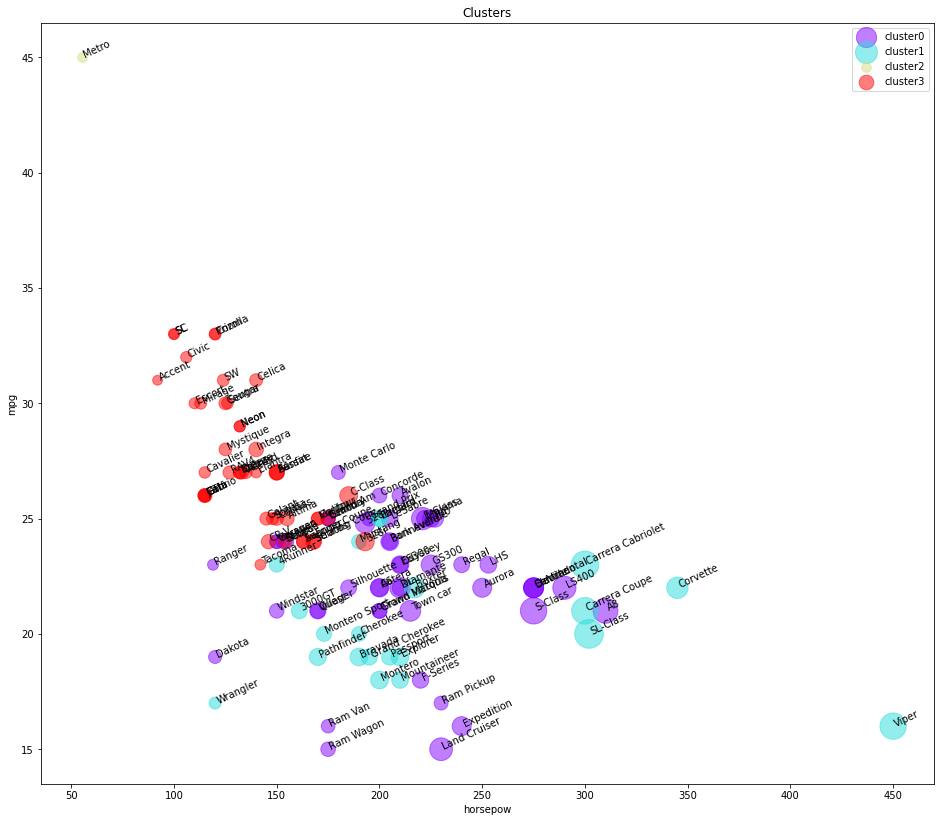

In [41]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt 
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Figura de tamaño 16 inches por 14 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

**Respuesta**






1.   Cluster0 (morado)=  autos de 125Hp- 325Hp con consumo de hasta 27.5 mpg, los mas costosos son los que tienes mas de 250Hp y un consumo de un poco mas de 20MPG.Consumo equilibrado respecto a la potencia.

2.   Cluster1(aguamarina) = Grupo muy parecido al anterior, los mas costosos tienen 300HP y un consumo entre 20-22.5MPG. Tiene los autos de mayor valor. Bajo consumo de gasolina respecto a la potencia. Autos eficientes. Gama alta.

3.   Cluster2(beige) = Autos que tienen 50HP y un consumo de 45MPG. Su precio es bajo.

2.   Cluster3(Rojo) = Autos que tienen  100-200Hp y su consumo es 23-33mpg. Son gama media, los de mayor consumo pero por debajo de los Beige. Se destaca mas por el consumo que por la potencia.





9. Obtener un conteo para cada cluster y analizar si las estructuras son balanceadas? Porque?

In [25]:
pdf.groupby(['cluster_']).size()

cluster_
0    49
1    21
2     1
3    46
dtype: int64

las estructuras parecen estar  balanceadas, excepto por el dato del cluster2. pero hay que tenerlo en cuenta porque define una categoria muy diferenciada de las demás.

In [27]:
from sklearn.cluster import KMeans
sum_sq_d = []
K = range(1,11)
print(K)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pdf[['horsepow', 'mpg']])
    sum_sq_d.append(km.inertia_)
print(sum_sq_d)   

range(1, 11)
[400477.7046153845, 164553.90320855615, 76331.05957575756, 51832.53132756132, 29377.347253968255, 21733.401413919415, 16300.306053244998, 12623.429094642961, 9637.548041256989, 7910.766979511716]


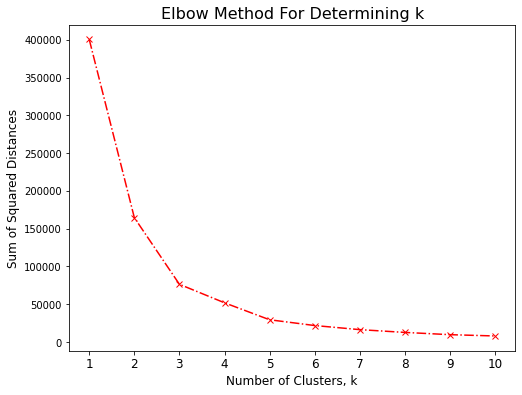

In [28]:
plt.figure(figsize=(8,6))
plt.plot(K, sum_sq_d, 'rx-.')
plt.xlabel('Number of Clusters, k', fontsize=12)
plt.xticks(range(1,11), fontsize=12)
plt.ylabel('Sum of Squared Distances', fontsize=12)
plt.xticks(fontsize=12)
plt.title('Elbow Method For Determining k', fontsize=16)
plt.show()

Segun el metodo Elbow, el número de clusters esta entre 3 y 4